<h3>Importing Libs</h3>

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

<h3> Loading Data </h3>

In [31]:
dataset_path = os.path.join('loan', 'loan.csv')
df = pd.read_csv(dataset_path)
df.head()

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Dataset size</h3>

In [32]:
df.shape

(39717, 111)

<h3> Checking Null Values Count On Each Columns</h3>

In [33]:
null_counts = df.isnull().sum()

null_counts

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<h3>Removing All Columns which are completly Null</h3>

In [43]:
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

<font color='red'>Out of 111 Columns, 54 Columns contains only null value</font><br>
<font color='red'>Removed 54 Columns Now we have 57 Columns left to Analysis</font>

<h4>Now Analysing Null Value Count of Remaning Columns</h4>

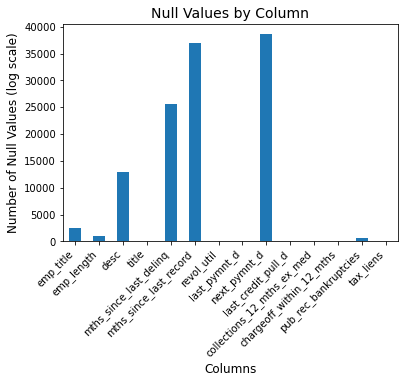

<Figure size 864x576 with 0 Axes>

In [47]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

<h3>Removing below Columns as it not possible to fix Missing Values</h3>
    <br>
<b><font color="Blue">mths_since_last_delinq</font>&nbsp;</b> {The number of months since the borrower's last delinquency.} <br>
<b><font color="Blue">mths_since_last_record</font>&nbsp;</b> {The number of months since the last public record.}<br>
<b><font color="Blue">next_pymnt_d</font>&nbsp;</b>	{Next scheduled payment date}<br>

Also Removing <b><font color="Blue">desc</font>&nbsp;</b> as it can't be standardised<br>
<b><font color="Blue">desc</font>&nbsp;</b>	{Loan description provided by the borrower}<br>

In [50]:
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'desc']
df = df.drop(columns=columns_to_drop)
df.shape

(39717, 53)

<font color='red'>Removed 4 Columns Now we have 53 Columns left to Analysis</font>